In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

C:\Users\Giulia\AppData\Local\Temp\ipykernel_5684\673120910.py:7: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
# import dataset
df = pd.read_csv("dataset-progetto/train.csv", skipinitialspace=True)
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,432027,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,182747,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,400091,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,197250,4.0,513.0,130.0,NaN,1.279305,breakbeat


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  bool   
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  object 
 5   album_name             15000 non-null  object 
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

In [4]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

name          object
artists       object
album_name    object
genre         object
dtype: object

In [5]:
df['genre'].unique()

array(['j-dance', 'iranian', 'black-metal', 'bluegrass', 'happy',
       'industrial', 'j-idol', 'spanish', 'sleep', 'techno', 'mandopop',
       'afrobeat', 'disney', 'study', 'indian', 'idm', 'forro',
       'chicago-house', 'brazil', 'breakbeat'], dtype=object)

In [6]:
len(df['genre'].unique())

20

In [7]:
len(df['album_name'].unique())

9820

In [8]:
len(df['artists'].unique())

6257

In [9]:
len(df['name'].unique())

#ovviamente le canzoni(i 15000 records) sono tutte diverse hanno tutti nomi diversi

15000

In [10]:
#questi quattro attributi categorici cosa faccimao? è impossibile trasformarli in numerical
#li eliminiamo per il clustering?

In [11]:
###i missing values:

In [12]:
df.isnull().sum()

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64

In [13]:
##abbiamo detto che popularity confidence lo eliminiamo
##e per il momento eliminiamo anche time_signature e mode* pero poi dovremmo capire come riempire i Nan

#*mode:
#questa variabile assume solo due valori o 0 o 1
# lo zero è assegnato a canzoni con tonalità minori (più cupe)
# l'1 è assegnato a canzoni con tonalità maggiori (più allegre)

#ci sarebbe da torvare uno o due attributi che mi possano aiutare ad inferire quqesti nan di mode
#es con valence e energy

In [14]:
##ma elimino anche i CATEGORICAL Name, Album_name, Artists e Genre* perchè non saprei come renderli numerical

#*Genre
#lui avrebbe 20 generi diversi, avrebbe senso renderli 
#numerical assegnangoli magari un numero d 1 a 20? boh per ora lo elimino

In [15]:
#alla fine ne elimino 12 di attributi 
#elimino:
# name, artists,album_name e genre perchè sono categorical 
# explicit perchè è bool e non so se puo dar noia nel clustering 
# mode e time_signature al momento le elimino perchè non so ancora come riempire i nan
# features_duration_ms lo elimino perchè ho gia duration_ms
#popularity_confidence lo elimino perchè ha troppo Nan
#n_beats e n_bars li elimino perchè c'è gia tempo che esprime i BPM
# processing perchè non so cosa sia e gli altri dataset non lo considerano 

#ma prima trasformo duration_ms in duration_m 
#e quindi poii dovrò eliminare anche duration_ms 



In [16]:
df_copy = df.copy()
df_copy["duration_m"] = df_copy["duration_ms"] / (60 * 1000)  # Converti da millisecondi a minuti
df_copy["duration_m"] = (df_copy["duration_m"] * 2).round() / 2
del df_copy['duration_ms']
df_copy.head()

#creo un df_copy che ha duration_m al posto di duration_ms 

,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,...,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre,duration_m
0,Long Road,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,...,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance,4.0
1,"Daniâl My Son, Where Did You Vanish?",False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,...,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian,7.5
2,Ondskapens Galakse,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,...,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal,5.5
3,Can't Look Away,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,...,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass,4.5
4,Thunderground,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,...,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy,5.0


In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   explicit               15000 non-null  bool   
 2   popularity             15000 non-null  int64  
 3   artists                15000 non-null  object 
 4   album_name             15000 non-null  object 
 5   danceability           15000 non-null  float64
 6   energy                 15000 non-null  float64
 7   key                    15000 non-null  int64  
 8   loudness               15000 non-null  float64
 9   mode                   10550 non-null  float64
 10  speechiness            15000 non-null  float64
 11  acousticness           15000 non-null  float64
 12  instrumentalness       15000 non-null  float64
 13  liveness               15000 non-null  float64
 14  valence                15000 non-null  float64
 15  te

In [18]:
#creo il df_clust eliminando da df_copy quei 12 attributi 

In [19]:
df_clust = df_copy.drop(['name','explicit', 'artists','album_name', 'mode','features_duration_ms','time_signature','n_beats','n_bars','popularity_confidence','processing','genre'], axis=1)
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        15000 non-null  int64  
 1   danceability      15000 non-null  float64
 2   energy            15000 non-null  float64
 3   key               15000 non-null  int64  
 4   loudness          15000 non-null  float64
 5   speechiness       15000 non-null  float64
 6   acousticness      15000 non-null  float64
 7   instrumentalness  15000 non-null  float64
 8   liveness          15000 non-null  float64
 9   valence           15000 non-null  float64
 10  tempo             15000 non-null  float64
 11  duration_m        15000 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 1.4 MB


In [20]:
df_clust.dtypes[df_clust.dtypes.map(lambda x: x == 'object')]
#controllo di non avere piu categorical

Series([], dtype: object)

In [21]:
df_clust.isnull().sum()
#controllo di non avere piu nan

popularity          0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_m          0
dtype: int64

In [22]:
df_clust.columns

Index(['popularity', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_m'],
      dtype='object')

popularity: INT
The popularity of a track is a value between 0 and 100, with 100 being the most popular.

danceability: FLOAT Danceability describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable

energy: FLOAT Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

*key: INT
The key the track is in. Integers map to pitches using standard Pitch Class notation.

loudness: FLOAT
The overall loudness of a track in decibels (dB)

speechiness: FLOAT
Speechiness detects the presence of spoken words in a track.

*acousticness: FLOAT
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

instrumentalness: FLOAT Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0

liveness: FLOAT  Detects the presence of an audience in the recording.

valence: FLOAT A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.

tempo: FLOAT The overall estimated tempo of a track in beats per minute (BPM).

duration_m: FLOAT
The track length in minutes


*' da rivedere 

In [23]:
#forse dovremmo rivedere anche quegli attributi che sono float o int ma che come significato dovrebbero essere bool

#### normalizzazione minmax scaler
L'obiettivo di tale normalizzazione è quello di portare tutte le features a una scala comune, evitando che alcune caratteristiche con valori numerici più elevati abbiano un peso sproporzionato rispetto ad altre con valori numerici più bassi. Questo è particolarmente importante per algoritmi come K-Means, dove la distanza e la scala dei dati possono influenzare notevolmente i risultati del clustering.


MinMaxScaler è un trasformatore di Scikit-learn che ridimensiona le feature in modo che siano comprese tra un determinato intervallo, di solito 0 e 1.
Questo avviene utilizzando la seguente formula: **Xscala = (X-Xmin)/(XMax-Xmin)**
normalizzazione Min-Max: dove X è il valore originale, Xmin è il valore minimo nella feature, XMax è il valore max della feature, e Xscala è il valore normalizzato





In [24]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(df_clust)

#train_data è il nome del df pronto per il clustering e normalizzato

In [25]:
#forse 12 attributi sono troppi per fare il clustering

In [26]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [27]:
%%time
sse_list = []
sil_list = []

for k in range(2, 51):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse_list.append(kmeans.inertia_)
    sil_list.append(silhouette_score(train_data, kmeans.labels_))

Wall time: 4min 54s


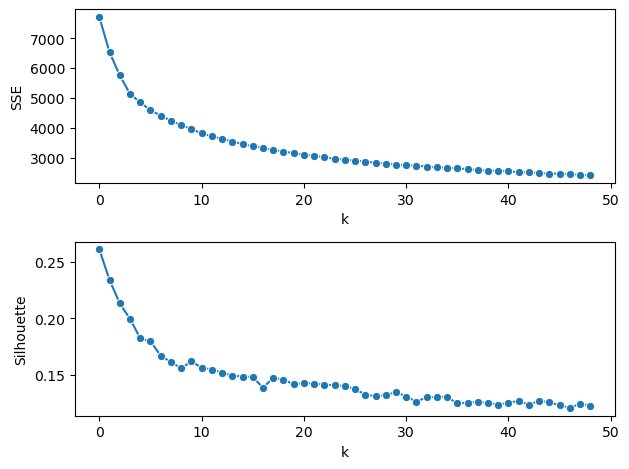

In [28]:
fig, axs = plt.subplots(2) 

sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')

sns.lineplot(x=range(len(sil_list)), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')

plt.tight_layout() # Adjust the padding between and around subplots